In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/NMIBC2.csv')
df

,Sample_Name,refage,sex,grade2,smkstat2,ImmunoTx,TenYearRFS,TenRFS,TenDead,TenYearSurv,...,Lymph,CD4T,CD8T,NLR,MLR,CD4_to_8,CD4mem_to_nv,CD8mem_to_nv,Tmem_to_nv,RecOrProg
0,202172220017_R01C01,69,male,Grade 3 + 4,ever-smoker,With Immuno,4.109589,1,1,53.322382,...,14.1,2.5,3.6,4.730496,0.794326,0.694444,1.777778,11.000000,4.083333,yes
1,202172220017_R02C01,67,male,Grade 1 + 2,ever-smoker,Without Immuno,98.299795,1,1,98.299795,...,32.1,11.7,10.6,1.772586,0.230530,1.103774,1170.000000,34.333333,70.967742,no
2,202172220017_R03C01,69,female,Grade 1 + 2,non-smoker,With Immuno,120.000000,0,0,120.000000,...,30.9,19.1,6.5,1.977346,0.168285,2.938462,1.728571,5.500000,2.200000,no
3,202172220017_R05C01,63,male,Grade 1 + 2,ever-smoker,Without Immuno,28.043836,1,0,120.000000,...,40.9,19.1,14.4,1.359413,0.051345,1.326389,46.750000,13.400000,22.928571,yes
4,202172220017_R06C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,58.546201,1,1,58.546201,...,26.6,13.6,2.9,2.045113,0.432331,4.689655,8.769231,0.705882,4.200000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,203755070060_R03C01,61,male,Grade 1 + 2,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,17.6,9.1,3.4,3.704545,0.630682,2.676471,1.600000,5.800000,2.125000,no
599,203755070060_R04C01,60,female,Grade 1 + 2,non-smoker,Without Immuno,4.800000,1,0,120.000000,...,42.4,26.3,4.6,1.087264,0.188679,5.717391,3.781818,0.000000,2.059406,yes
600,203755070060_R05C01,50,male,Grade 1 + 2,non-smoker,Without Immuno,120.000000,0,0,120.000000,...,28.9,12.2,3.9,2.027682,0.332180,3.128205,2.666667,0.560000,1.758621,no
601,203755070060_R06C01,67,male,Grade 3 + 4,ever-smoker,Without Immuno,120.000000,0,0,120.000000,...,27.2,14.9,3.0,2.202206,0.202206,4.966667,3.138889,0.666667,2.314815,no


In [3]:
df.columns

Index(['Sample_Name', 'refage', 'sex', 'grade2', 'smkstat2', 'ImmunoTx',
       'TenYearRFS', 'TenRFS', 'TenDead', 'TenYearSurv', 'SurgToBlood',
       'SurgToBlood3', 'ProgressYN', 'RecurYN', 'Bas', 'Bmem', 'Bnv', 'CD4mem',
       'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg', 'Bas2',
       'Bmem2', 'Bnv2', 'CD4mem2', 'CD4nv2', 'CD8mem2', 'CD8nv2', 'Eos2',
       'Mono2', 'Neu2', 'NK2', 'Treg2', 'T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv',
       'RecOrProg'],
      dtype='object')

### Remove the variables that are not used in training

In [4]:
df.drop(['Sample_Name','TenYearRFS', 'TenRFS','TenYearSurv', 'SurgToBlood3','ProgressYN', 'RecurYN', 'Bas', 'Bmem', 'Bnv', 'CD4mem',
       'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK', 'Treg','T_cell', 'Lymph', 'CD4T', 'CD8T',
       'NLR', 'MLR', 'CD4_to_8', 'CD4mem_to_nv', 'CD8mem_to_nv', 'Tmem_to_nv','RecOrProg','Eos2'],axis=1,inplace=True)
df.columns

Index(['refage', 'sex', 'grade2', 'smkstat2', 'ImmunoTx', 'TenDead',
       'SurgToBlood', 'Bas2', 'Bmem2', 'Bnv2', 'CD4mem2', 'CD4nv2', 'CD8mem2',
       'CD8nv2', 'Mono2', 'Neu2', 'NK2', 'Treg2'],
      dtype='object')

In [5]:
df.dtypes

refage           int64
sex             object
grade2          object
smkstat2        object
ImmunoTx        object
TenDead          int64
SurgToBlood    float64
Bas2           float64
Bmem2          float64
Bnv2           float64
CD4mem2        float64
CD4nv2         float64
CD8mem2        float64
CD8nv2         float64
Mono2          float64
Neu2           float64
NK2            float64
Treg2          float64
dtype: object

### Although it is ok to have whitespace in the value in 'grade2', and 'ImmunoTx'for XGBoost and classification, we can't have any whitespace if we want to draw a tree.

In [6]:
df.replace(' ','_',regex=True, inplace=True)
df.head()

,refage,sex,grade2,smkstat2,ImmunoTx,TenDead,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
0,69,male,Grade_3_+_4,ever-smoker,With_Immuno,1,757.0,2.500,0.0,3.1,1.6,0.90,3.3,0.3,11.2,66.7,4.9,0.0
1,67,male,Grade_1_+_2,ever-smoker,Without_Immuno,1,739.0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,7.4,56.9,6.0,0.0
2,69,female,Grade_1_+_2,non-smoker,With_Immuno,0,212.0,1.600,0.0,2.6,12.1,7.00,5.5,1.0,5.2,61.1,2.7,0.0
3,63,male,Grade_1_+_2,ever-smoker,Without_Immuno,0,650.0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,2.1,55.6,3.8,0.0
4,61,male,Grade_1_+_2,ever-smoker,Without_Immuno,1,571.0,4.196,0.8,7.0,11.4,1.30,1.2,1.7,11.5,54.4,2.3,0.9


In [7]:
df2 = df.assign(sex = np.where(df['sex']=='male',1,2),
             grade2 = np.where(df['grade2']=='Grade_1_+_2',1,2),
             smkstat2 = np.where(df['smkstat2']=='non-smoker',1,2),
             ImmunoTx = np.where(df['ImmunoTx']=='Without_Immuno',1,2)).copy()
df2.head()
df.columns

Index(['refage', 'sex', 'grade2', 'smkstat2', 'ImmunoTx', 'TenDead',
       'SurgToBlood', 'Bas2', 'Bmem2', 'Bnv2', 'CD4mem2', 'CD4nv2', 'CD8mem2',
       'CD8nv2', 'Mono2', 'Neu2', 'NK2', 'Treg2'],
      dtype='object')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   refage       603 non-null    int64  
 1   sex          603 non-null    int64  
 2   grade2       603 non-null    int64  
 3   smkstat2     603 non-null    int64  
 4   ImmunoTx     603 non-null    int64  
 5   TenDead      603 non-null    int64  
 6   SurgToBlood  598 non-null    float64
 7   Bas2         603 non-null    float64
 8   Bmem2        603 non-null    float64
 9   Bnv2         603 non-null    float64
 10  CD4mem2      603 non-null    float64
 11  CD4nv2       603 non-null    float64
 12  CD8mem2      603 non-null    float64
 13  CD8nv2       603 non-null    float64
 14  Mono2        603 non-null    float64
 15  Neu2         603 non-null    float64
 16  NK2          603 non-null    float64
 17  Treg2        603 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 84.9 KB


In [9]:
print(df2.isnull().sum())

refage         0
sex            0
grade2         0
smkstat2       0
ImmunoTx       0
TenDead        0
SurgToBlood    5
Bas2           0
Bmem2          0
Bnv2           0
CD4mem2        0
CD4nv2         0
CD8mem2        0
CD8nv2         0
Mono2          0
Neu2           0
NK2            0
Treg2          0
dtype: int64


In [10]:
df2.describe()

,refage,sex,grade2,smkstat2,ImmunoTx,TenDead,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,598.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,63.159204,1.242123,1.250415,1.829187,1.147595,0.298507,410.316054,1.763761,0.415423,3.503317,10.161148,2.946245,4.392617,1.919619,6.473625,62.553731,3.759449,0.257625
std,9.727749,0.428724,0.433611,0.376658,0.354993,0.457983,317.480696,1.024710,0.719480,2.106616,6.535661,2.447544,3.760594,1.696386,3.053325,11.720252,2.009762,0.501842
min,29.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,35.000000,0.000000,0.000000
25%,57.000000,1.000000,1.000000,2.000000,1.000000,0.000000,170.750000,1.100000,0.000000,2.000000,5.450000,1.200000,1.600000,0.600000,4.300000,55.600000,2.300000,0.000000
50%,66.000000,1.000000,1.000000,2.000000,1.000000,0.000000,315.000000,1.700000,0.000000,3.200000,9.100000,2.400000,3.200000,1.500000,6.500000,62.800000,3.400000,0.000000
75%,71.000000,1.000000,1.500000,2.000000,1.000000,1.000000,559.000000,2.500000,0.600000,4.600000,13.500000,4.100000,6.700000,2.800000,8.500000,70.950000,4.900000,0.300000
max,79.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1790.000000,4.196000,2.900000,9.600000,28.944000,10.392000,14.796000,6.500000,13.992000,94.100000,9.596000,1.996000


## Some missing values in 'SurgToBlood'. Using RandomForest to fit missing values

In [11]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_BD(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    BD_df = df[['SurgToBlood','refage', 'Bas2', 'Bmem2', 'Bnv2', 
                'CD4mem2', 'CD4nv2', 'CD8mem2',
                'CD8nv2', 'Mono2', 'Neu2', 'NK2', 'Treg2']]

    # NMIBC patients 分成已知 BD time和未知 BD time 两部分
    known_BD = BD_df[BD_df.SurgToBlood.notnull()].values
    unknown_BD = BD_df[BD_df.SurgToBlood.isnull()].values

    # y即目标 BD time
    y = known_BD[:, 0]

    # X即特征属性值
    X = known_BD[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedBD = rfr.predict(unknown_BD[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.SurgToBlood.isnull()), 'SurgToBlood' ] = predictedBD 

    return df, rfr

df3, rfr = set_missing_BD(df2)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   refage       603 non-null    int64  
 1   sex          603 non-null    int64  
 2   grade2       603 non-null    int64  
 3   smkstat2     603 non-null    int64  
 4   ImmunoTx     603 non-null    int64  
 5   TenDead      603 non-null    int64  
 6   SurgToBlood  603 non-null    float64
 7   Bas2         603 non-null    float64
 8   Bmem2        603 non-null    float64
 9   Bnv2         603 non-null    float64
 10  CD4mem2      603 non-null    float64
 11  CD4nv2       603 non-null    float64
 12  CD8mem2      603 non-null    float64
 13  CD8nv2       603 non-null    float64
 14  Mono2        603 non-null    float64
 15  Neu2         603 non-null    float64
 16  NK2          603 non-null    float64
 17  Treg2        603 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 84.9 KB


In [13]:
df3.describe()

,refage,sex,grade2,smkstat2,ImmunoTx,TenDead,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,63.159204,1.242123,1.250415,1.829187,1.147595,0.298507,411.110707,1.763761,0.415423,3.503317,10.161148,2.946245,4.392617,1.919619,6.473625,62.553731,3.759449,0.257625
std,9.727749,0.428724,0.433611,0.376658,0.354993,0.457983,316.438728,1.024710,0.719480,2.106616,6.535661,2.447544,3.760594,1.696386,3.053325,11.720252,2.009762,0.501842
min,29.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,35.000000,0.000000,0.000000
25%,57.000000,1.000000,1.000000,2.000000,1.000000,0.000000,176.000000,1.100000,0.000000,2.000000,5.450000,1.200000,1.600000,0.600000,4.300000,55.600000,2.300000,0.000000
50%,66.000000,1.000000,1.000000,2.000000,1.000000,0.000000,316.000000,1.700000,0.000000,3.200000,9.100000,2.400000,3.200000,1.500000,6.500000,62.800000,3.400000,0.000000
75%,71.000000,1.000000,1.500000,2.000000,1.000000,1.000000,564.500000,2.500000,0.600000,4.600000,13.500000,4.100000,6.700000,2.800000,8.500000,70.950000,4.900000,0.300000
max,79.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1790.000000,4.196000,2.900000,9.600000,28.944000,10.392000,14.796000,6.500000,13.992000,94.100000,9.596000,1.996000


### The columns of data that we will use to make classifications

In [14]:
X = df3.drop('TenDead',axis=1).copy()
X.head()

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
0,69,1,2,2,2,757.0,2.500,0.0,3.1,1.6,0.90,3.3,0.3,11.2,66.7,4.9,0.0
1,67,1,1,2,1,739.0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,7.4,56.9,6.0,0.0
2,69,2,1,1,2,212.0,1.600,0.0,2.6,12.1,7.00,5.5,1.0,5.2,61.1,2.7,0.0
3,63,1,1,2,1,650.0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,2.1,55.6,3.8,0.0
4,61,1,1,2,1,571.0,4.196,0.8,7.0,11.4,1.30,1.2,1.7,11.5,54.4,2.3,0.9


In [15]:
X.dtypes

refage           int64
sex              int64
grade2           int64
smkstat2         int64
ImmunoTx         int64
SurgToBlood    float64
Bas2           float64
Bmem2          float64
Bnv2           float64
CD4mem2        float64
CD4nv2         float64
CD8mem2        float64
CD8nv2         float64
Mono2          float64
Neu2           float64
NK2            float64
Treg2          float64
dtype: object

In [16]:
X.describe()

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,63.159204,1.242123,1.250415,1.829187,1.147595,411.110707,1.763761,0.415423,3.503317,10.161148,2.946245,4.392617,1.919619,6.473625,62.553731,3.759449,0.257625
std,9.727749,0.428724,0.433611,0.376658,0.354993,316.438728,1.024710,0.719480,2.106616,6.535661,2.447544,3.760594,1.696386,3.053325,11.720252,2.009762,0.501842
min,29.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,35.000000,0.000000,0.000000
25%,57.000000,1.000000,1.000000,2.000000,1.000000,176.000000,1.100000,0.000000,2.000000,5.450000,1.200000,1.600000,0.600000,4.300000,55.600000,2.300000,0.000000
50%,66.000000,1.000000,1.000000,2.000000,1.000000,316.000000,1.700000,0.000000,3.200000,9.100000,2.400000,3.200000,1.500000,6.500000,62.800000,3.400000,0.000000
75%,71.000000,1.000000,1.500000,2.000000,1.000000,564.500000,2.500000,0.600000,4.600000,13.500000,4.100000,6.700000,2.800000,8.500000,70.950000,4.900000,0.300000
max,79.000000,2.000000,2.000000,2.000000,2.000000,1790.000000,4.196000,2.900000,9.600000,28.944000,10.392000,14.796000,6.500000,13.992000,94.100000,9.596000,1.996000


### The column of data that we want to predict.

In [17]:
#y = df.assign(RecOrProg = np.where(df['RecOrProg']=='yes',1,0))['RecOrProg'].copy()
y = df3['TenDead'].copy()
y.head()

0    1
1    1
2    0
3    0
4    1
Name: TenDead, dtype: int64

### Now we simply split the data into training and testing sets and build the model. However, first, let's observe that this data is imbalanced by dividing the number of people who has tumor recurrence or progression, where y =1, by the total number of people in the dataset.

In [18]:
print(sum(y)/len(y))
print(sum(y))
print(len(y))

0.29850746268656714
180
603


### 30% of the NMIBC patients in the dataset have deceased within 10 year. We can split using stratification in order to maintain tha same percentage of NmIBC patients who have tumor recurrence or progression in both the training set and the testing set.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify = y,test_size=0.2)

In [20]:
print(sum(y_train)/len(y_train))
print(sum(y_train))
print(len(y_train))
print(sum(y_test)/len(y_test))
print(sum(y_test))
print(len(y_test))

0.2987551867219917
144
482
0.2975206611570248
36
121


In [21]:
X_train

,refage,sex,grade2,smkstat2,ImmunoTx,SurgToBlood,Bas2,Bmem2,Bnv2,CD4mem2,CD4nv2,CD8mem2,CD8nv2,Mono2,Neu2,NK2,Treg2
17,68,1,1,1,1,193.0,1.4,0.0,6.7,9.500,1.9,2.0,1.8,7.7,65.6,3.900,0.5
27,65,1,1,1,2,344.0,2.3,0.0,4.0,7.500,4.0,0.0,1.2,8.7,67.5,5.500,0.0
124,46,1,2,1,2,1564.0,3.6,0.0,6.0,8.400,5.1,2.2,5.6,8.4,53.7,5.000,0.0
395,61,1,2,2,1,348.0,0.0,0.7,1.4,0.600,1.7,0.3,1.5,4.3,80.2,2.500,1.8
242,29,2,1,1,1,161.0,3.4,0.8,6.0,8.200,3.0,7.9,6.4,6.5,52.2,5.100,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,64,2,1,1,1,288.0,2.9,1.7,5.6,9.000,9.9,4.7,6.4,6.1,41.8,9.596,1.6
83,50,1,2,2,1,1112.0,0.3,2.7,6.6,9.300,2.2,2.7,1.5,4.9,67.2,2.300,0.0
147,51,1,1,2,1,1323.0,2.8,0.0,0.8,2.000,1.5,0.3,0.8,7.7,78.2,5.400,0.0
269,45,1,1,1,1,1265.0,0.7,0.9,6.1,28.944,2.0,9.7,6.5,2.2,35.0,3.300,0.0


# Ensembling & Stacking models

In [22]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import StackingClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Generating our Base First-Level Models

## Find best parameter for SVM

In [34]:
# First Round
param_svm = {
    'gamma':[1,0.1,1e-2,1e-3,1e-4,1e-5,1e-6],
    'C':[0.1,1,10,100,1000]
}

optimal_params_svm = GridSearchCV(estimator=SVC(kernel='rbf',
                                                random_state = 40),
                                  param_grid=param_svm,
                                  scoring='roc_auc',
                                  verbose=0,
                                  n_jobs = 10,
                                  cv = 5)
optimal_params_svm.fit(X_train,
                       y_train)
print(optimal_params_svm.best_params_)

{'C': 1000, 'gamma': 1e-06}


In [35]:
# Second Round
param_svm = {
    'gamma':[1e-6,1e-10,1e-15,1e-20,1e-25],
    'C':[1000,2000,3000,3500,3600]
}

optimal_params_svm = GridSearchCV(estimator=SVC(kernel='rbf',
                                                random_state = 40),
                                  param_grid=param_svm,
                                  scoring='roc_auc',
                                  verbose=0,
                                  n_jobs = 10,
                                  cv = 5)
optimal_params_svm.fit(X_train,
                       y_train)
print(optimal_params_svm.best_params_)
print(optimal_params_svm.best_score_)

{'C': 3500, 'gamma': 1e-10}
0.740590819446667


### Best parameter for SVC: {'C': 3500, 'gamma': 1e-10}

## Find best parameter for LR

In [36]:
# First Round
param_LR = {
    'penalty':['l1','l2','elasticnet'],
    'C':[0.1,1,10,100,1000]
}

optimal_params_LR = GridSearchCV(estimator=LogisticRegression(random_state = 40),
                                 param_grid=param_LR,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_LR.fit(X_train,
                      y_train)
print(optimal_params_LR.best_params_)
print(optimal_params_LR.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.7521941509491085


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
# Second Round
param_LR = {
    'penalty':['l1','l2','elasticnet'],
    'C':[200,250,500,1000,2000]
}

optimal_params_LR = GridSearchCV(estimator=LogisticRegression(random_state = 40),
                                 param_grid=param_LR,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_LR.fit(X_train,
                      y_train)
print(optimal_params_LR.best_params_)
print(optimal_params_LR.best_score_)

{'C': 250, 'penalty': 'l2'}
0.7533839423571796


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Best parameter for LR: {'C': 250, 'penalty': 'l2'}

## Find best parameter for RandomForest

In [41]:
# First Round
param_RF = {
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

optimal_params_RF = GridSearchCV(estimator=RandomForestClassifier(random_state = 40),
                                 param_grid=param_RF,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_RF.fit(X_train,
                      y_train)
print(optimal_params_RF.best_params_)
print(optimal_params_RF.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
0.7503396160316932


In [42]:
# Second Round
param_RF = {
    'n_estimators': [50,100,150,200,250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

optimal_params_RF = GridSearchCV(estimator=RandomForestClassifier(random_state = 40),
                                 param_grid=param_RF,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_RF.fit(X_train,
                      y_train)
print(optimal_params_RF.best_params_)
print(optimal_params_RF.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 150}
0.7522887049827652


### Best parameter for RF: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 150}

## Find best parameter for Gradient Boosting

In [45]:
# First Round
param_GB = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,6,7,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.6, 0.8, 0.9, 1.0],
    "n_estimators":[10,50,100]
}

optimal_params_GB = GridSearchCV(estimator=GradientBoostingClassifier(loss='deviance',random_state = 40),
                                 param_grid=param_GB,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_GB.fit(X_train,
                      y_train)
print(optimal_params_GB.best_params_)
print(optimal_params_GB.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.2, 'min_samples_split': 0.5, 'n_estimators': 50, 'subsample': 0.8}
0.7551897135591241


In [51]:
# Second Round
param_GB = {
    'learning_rate': [0.2,0.25,0.3],
    "min_samples_split": [0.5,0.55,0.6,0.65],
    "min_samples_leaf": [0.15, 0.2,0.25],
    "max_depth":[2,3,4],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.6, 0.7,0.8, 0.9],
    "n_estimators":[75,80,85]
}

optimal_params_GB = GridSearchCV(estimator=GradientBoostingClassifier(loss='deviance',random_state = 40),
                                 param_grid=param_GB,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_GB.fit(X_train,
                      y_train)
print(optimal_params_GB.best_params_)
print(optimal_params_GB.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.2, 'min_samples_split': 0.6, 'n_estimators': 80, 'subsample': 0.8}
0.7592379669314974


### Best parameter for GB: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.2, 'min_samples_split': 0.6, 'n_estimators': 80, 'subsample': 0.8}

## Find best parameter for XGBoosting

In [52]:
# Round 1
param_XG = {
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.1,0.05,0.01,0.005,0.001],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[0,0.5,1.0,5.0,10],
    'scale_pos_weight':[1,3,5,7,9]
}

optimal_params_XG = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic',
                                                         seed = 40,
                                                         subsample=0.9,
                                                         colsample_bytree=0.5),
                                 param_grid=param_XG,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_XG.fit(X_train,
                      y_train,
                      verbose = False,
                      early_stopping_rounds=10,
                      eval_metric='auc',
                      eval_set=[(X_test,y_test)])
print(optimal_params_XG.best_params_)
print(optimal_params_XG.best_score_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 10, 'scale_pos_weight': 1}
0.7411054063931285


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [53]:
# Round 2
param_XG = {
    'max_depth':[5,6,7],
    'learning_rate':[0.1,0.15,0.2],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[10,15,20,30,40],
    'scale_pos_weight':[1,3,5]
}

optimal_params_XG = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic',
                                                         seed = 40,
                                                         subsample=0.9,
                                                         colsample_bytree=0.5),
                                 param_grid=param_XG,
                                 scoring='roc_auc',
                                 verbose=0,
                                 n_jobs = 10,
                                 cv = 5)
optimal_params_XG.fit(X_train,
                      y_train,
                      verbose = False,
                      early_stopping_rounds=10,
                      eval_metric='auc',
                      eval_set=[(X_test,y_test)])
print(optimal_params_XG.best_params_)
print(optimal_params_XG.best_score_)

{'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 20, 'scale_pos_weight': 1}
0.7439005620261486


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Best parameter for XGBoost: {'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 20, 'scale_pos_weight': 1}

### Create base classifier

In [188]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
estimators = [
    ('svc',make_pipeline(StandardScaler(),SVC(C= 3500, gamma= 1e-10, kernel='rbf'))),
    ('lr',LogisticRegression(C= 250, penalty= 'l2')),
    ('rf',RandomForestClassifier(criterion= 'entropy', max_depth= 7, max_features= 'auto', n_estimators= 150)),
    ('gb',GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.2, max_depth= 2, 
                                     max_features= 'log2', min_samples_leaf= 0.2,
                                     min_samples_split= 0.6, n_estimators= 80, subsample= 0.8)),
    ('xg',XGBClassifier(objective ='binary:logistic',gamma= 0.5, learning_rate= 0.15, max_depth= 6, 
                        reg_lambda= 20, scale_pos_weight= 2.3,subsample=0.9,colsample_bytree=0.5))
]

## Stacking classifier

In [199]:
clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(scale_pos_weight= 6,
                                                                              reg_lambda= 100),cv=4,passthrough=True)

In [204]:
clf.fit(X_train, y_train)

TypeError: fit() got an unexpected keyword argument 'verbose'

In [201]:
clf.score(X_test, y_test)

0.7272727272727273

In [202]:
pred = clf.predict(X_test)
print(pred)
print(sum(pred))
print(len(pred))

[1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0]
41
121


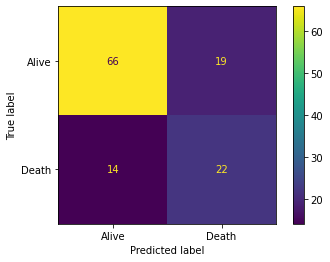

In [203]:
plot_confusion_matrix(clf,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### We care about the NMIBC patients who are easily to die

# If a base-model performs as well as or better than the stacking ensemble, the base model should be used instead, given its lower complexity (e.g. it’s simpler to describe, train and maintain).